Lab 2

We are looking at a gamma ray source. With a telescope that has a background of cosmic-ray that has a Poisson distribution. 
Lets take the average dally cosmic ray background is 3 and the number of gamma rays of the source we are looking at emitted on average per day is 10

1. A)
We will first set up a plot the background described above
And then sum it over multiple days


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
import seaborn as sb
from fractions import Fraction 

plt.rcParams["figure.figsize"] = (15,10)

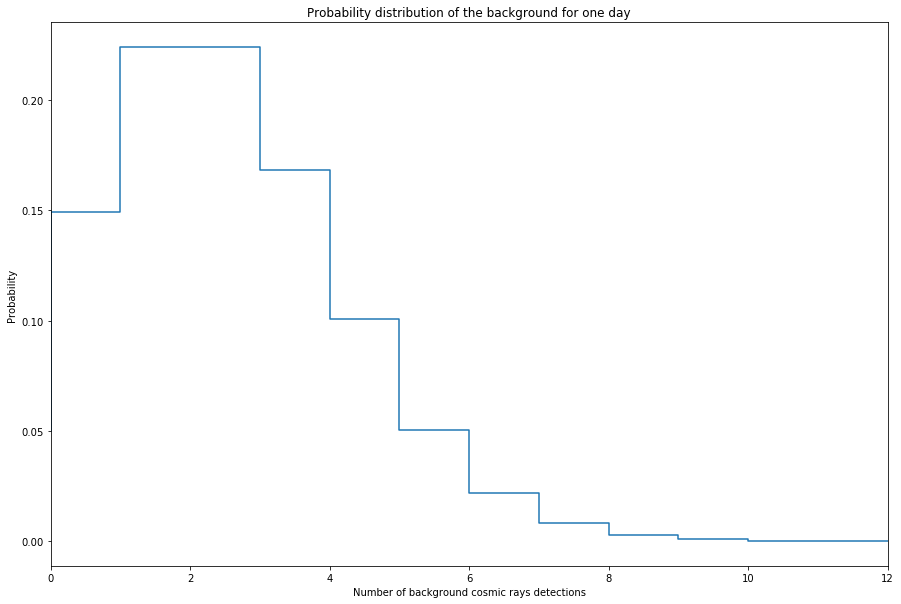

In [78]:
#lets set up a Poisson distribution

#x = np.arange(stats.poisson.pmf(0.01, mu),stats.poisson.ppf(0.99, mu))
mu = 3
x=list(range(120))
Background = scipy.stats.poisson.pmf(x,mu)
plt.xlim([0,12])
plt.ylabel('Probability')
plt.xlabel('Number of background cosmic rays detections')
plt.title('Probability distribution of the background for one day')
plt.matplotlib.pyplot.step(x,Background)
plt.show()

In [79]:
def multiconvolve (x,n):
    Backgound=x
    
    if n <= 1:
        return (signal)
   
    con = signal.convolve(Backgound,Backgound) 
    for i in range(0, n-2):
        con = signal.convolve(con,Backgound) 
        i+=1
    con = np.append(con,[0]*(n-1))    
    return(con)

Now let us look at how this background vary over days of observations, we expect it to spread out and become more Gaussian looking, as we can see below

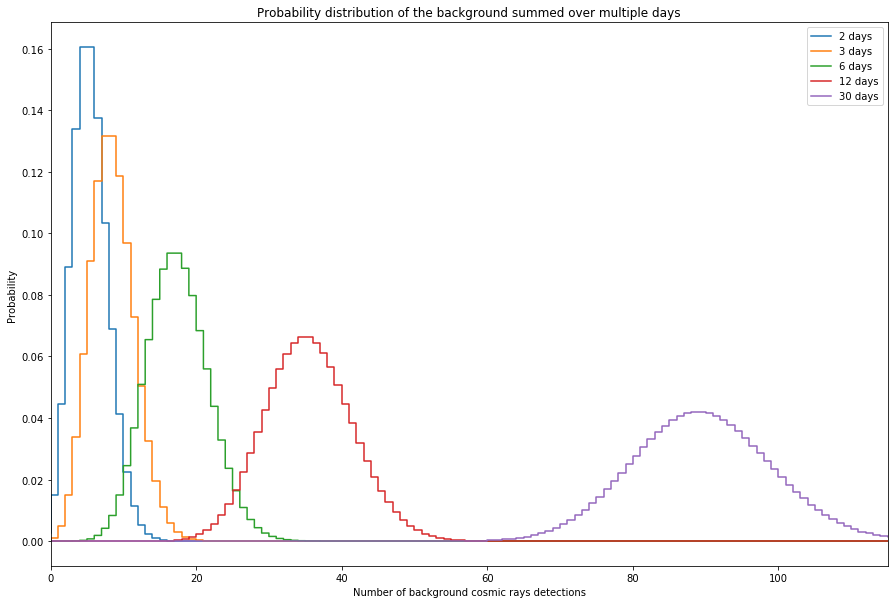

In [80]:
twoDays = multiconvolve(Background,2)
threeDays = multiconvolve(Background,3)
sixDays =  multiconvolve(Background,6)
twelveDays =  multiconvolve(Background,12)
thirtyDays =  multiconvolve(Background,30)
plt.matplotlib.pyplot.step((list(range(len(twoDays)))),twoDays, label ='2 days')
plt.matplotlib.pyplot.step((list(range(len(threeDays)))),threeDays, label = '3 days')
plt.matplotlib.pyplot.step((list(range(len(sixDays)))),sixDays, label = '6 days')
plt.matplotlib.pyplot.step((list(range(len(twelveDays)))),twelveDays, label = "12 days")
plt.matplotlib.pyplot.step((list(range(len(thirtyDays)))),thirtyDays,label= "30 days")
plt.xlim([0,115])
plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over multiple days')
plt.legend()
plt.show()

B)
Bellow we have the graph of the background summed over 5 days. It looks Gaussian until you see it on a log scale where it is evident that the tail is skewed and not Gaussian. One other obvious reasons for it to not be Gaussian yet is that it is still very much discreet, as we sum over more days the step size will get smaller until it approaches a continuous curve but at 5 days we are not there yet. There is also the issuer of the hard cut of at 0 the Poisson does not allow for negative values, put we do have a probability of having 0 events, this makes the jump at 0 quite big. As seen on the log graph bellow it cuts of the graph and the graph is not symmetric due to this jump.


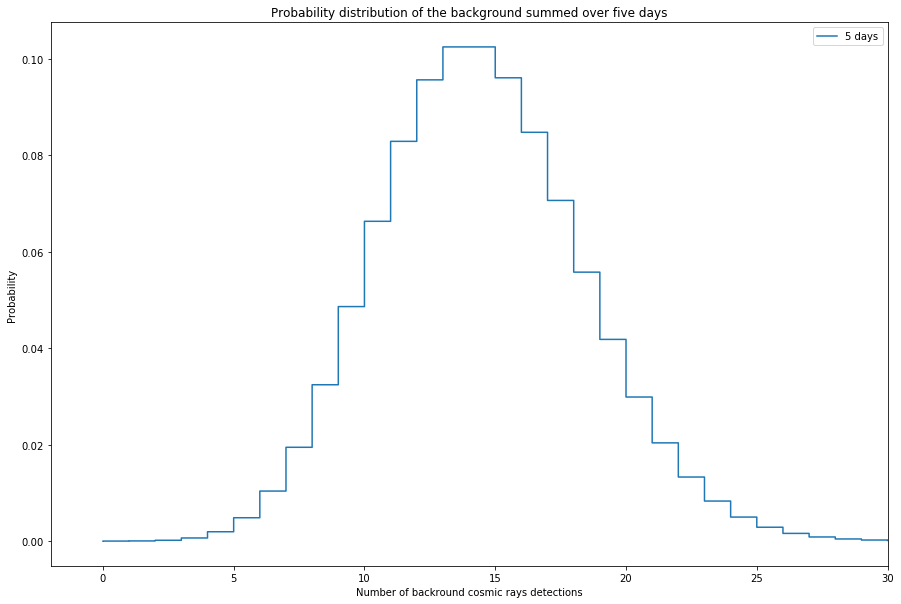

In [81]:
fiveDays =  multiconvolve(Background,5)
plt.matplotlib.pyplot.step((list(range(len(fiveDays)))),fiveDays, label ='5 days')
plt.xlabel('Number of backround cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background summed over five days')
plt.legend()
plt.xlim([-2,30])
plt.show()


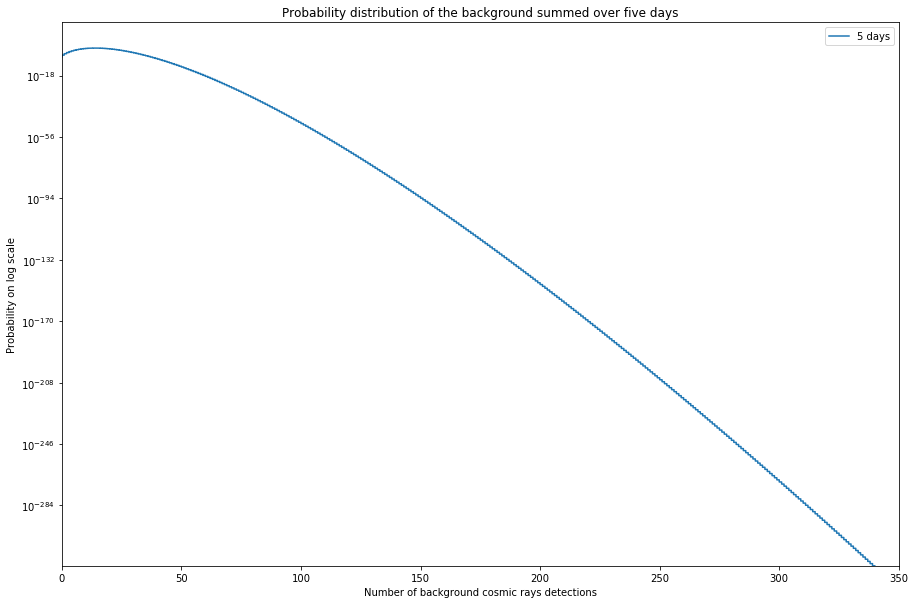

In [82]:
plt.matplotlib.pyplot.step((list(range(len(fiveDays)))),fiveDays, label ='5 days')
plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability on log scale')
plt.title('Probability distribution of the background summed over five days')
plt.legend()
plt.yscale('log')
plt.xlim([0,350])
plt.show()

C)
As we average days we can see how the distributions change bellow, of interests is the semi log plot when comparing to a Gaussian. We still have the same cut off we got back in part B until we are averaging 300 days or so, at that point the distribution is still right skewed in the tails but starts becoming symmetric around 1000 days. We see the graphs become more and more Gaussian which make sense since any dist averaged multiple times will approach Gaussian due to the central limit theorem

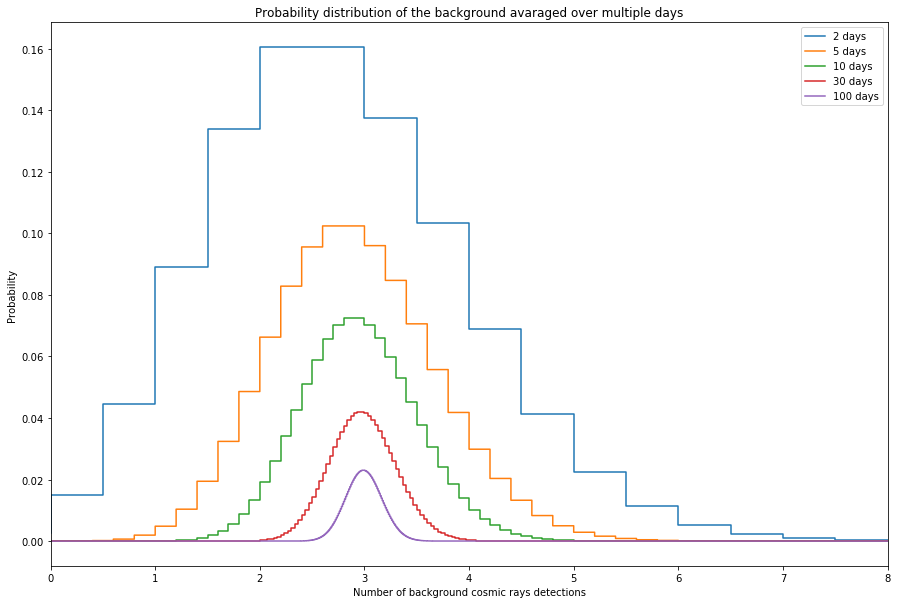

In [84]:
mu = 3
#x=list(range(12))
x = np.array(list(range(120)))
Background = scipy.stats.poisson.pmf(x,mu)
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
hundodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(hundodaysAve[0],hundodaysAve[1], label ='100 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background avaraged over multiple days')
plt.legend()
plt.xlim([0,8])
plt.show()


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


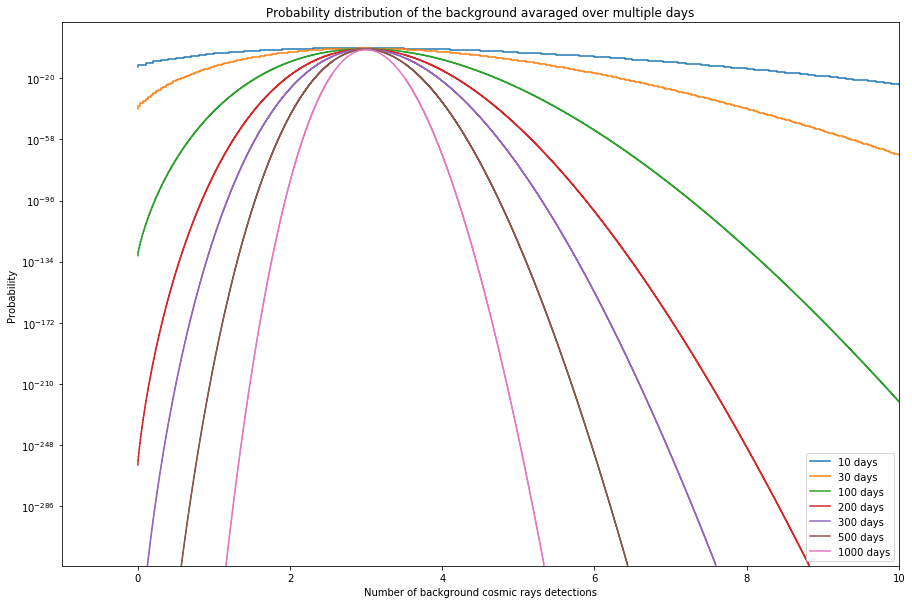

In [85]:

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
hundodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(hundodaysAve[0],hundodaysAve[1], label ='100 days')

n=200
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='200 days')

n=300
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='300 days')

n=500
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='500 days')

n=1000
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.matplotlib.pyplot.step(kdaysAve[0],kdaysAve[1], label ='1000 days')

plt.xlabel('Number of background cosmic rays detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background avaraged over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([-1,10])
plt.show()



D) 
Lets say after two days of observations we want to know what is the sigma associated with the probability of seeing 20 or more events in two days due to the background distribution.

In [86]:
twoDaycmf = scipy.integrate.cumtrapz(twodaysAve[1])
P = twoDaycmf[20]
print('We get a simga of {0:1.3f}'.format(stats.norm.ppf(P)))

We get a simga of 3.026


2.
Let us say we have a background distribution of a Rayleigh that has scale of 10 per day.

A)
Let us look at how a skewed distribution such as the Rayleigh change as we average over multiple days 


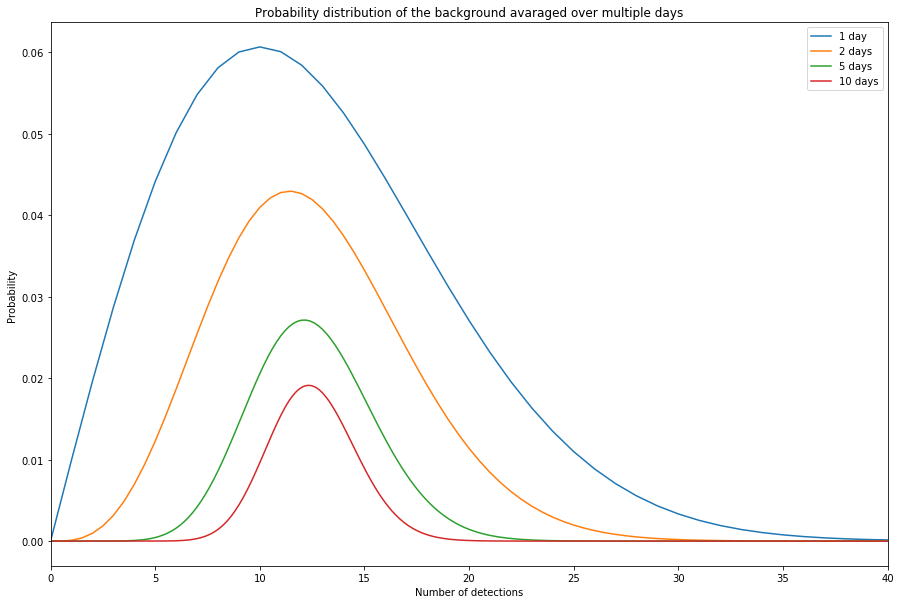

In [89]:
x = list(range(200))
Background = scipy.stats.rayleigh.pdf(x,scale = 10)
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

#n=30
#thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
#plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

plt.xlabel('Number of detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background avaraged over multiple days')
plt.legend()
plt.xlim([0,40])
plt.show()

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


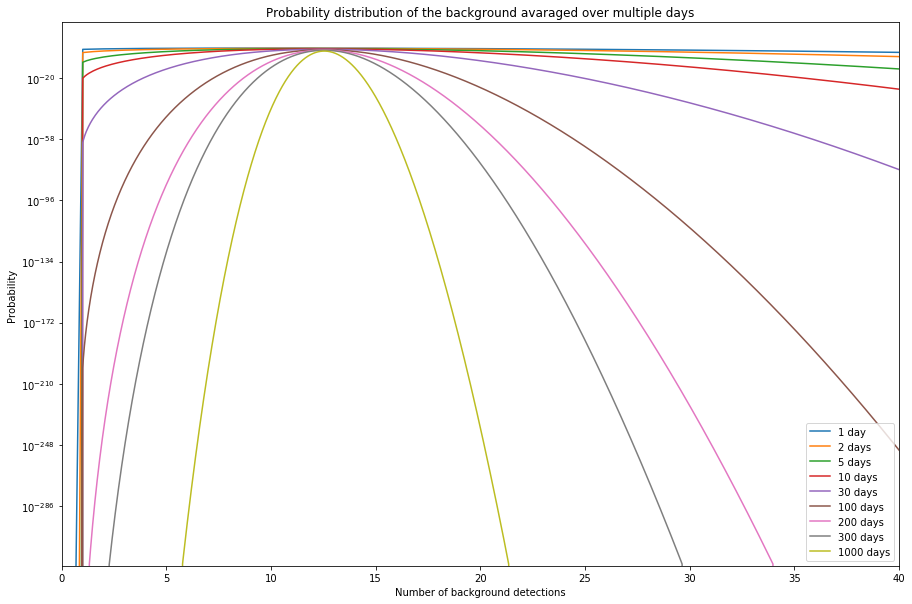

In [90]:
plt.plot(Background, label = "1 day")
n=2
twodaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(twodaysAve[0],twodaysAve[1], label ='2 days')
n=5
fivedaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(fivedaysAve[0],fivedaysAve[1], label ='5 days')

n=10
tendaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(tendaysAve[0],tendaysAve[1], label ='10 days')

n=30
thirtydaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(thirtydaysAve[0],thirtydaysAve[1], label ='30 days')

n=100
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='100 days')

n=200
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='200 days')

n=300
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='300 days')

n=1000
kdaysAve = [np.array(list(range(len(multiconvolve(Background,n)))))/n,multiconvolve(Background,n)]
plt.plot(kdaysAve[0],kdaysAve[1], label ='1000 days')

plt.xlabel('Number of background detections')
plt.ylabel('Probability')
plt.title('Probability distribution of the background avaraged over multiple days')
plt.legend()
plt.yscale('log')
plt.xlim([0,40])
plt.show()

B)
As we average over more days the shape of our distribution becomes more symmetric and narrower, by looking at the semi log graph we can see how it approaches a Gaussian, it stops having a hard cut off at 0 for an average of 100 days and starts to really lose the asymmetry at 1000 days.

3.
A) Now we are looking at the sky with an optical telescope and have flat feilded the over the image 
Let us say we have a background Gaussian distribution with width of 3, and we find a measurement of value 12.112 from a particular pixel were we expect to see a signal from. we what to know the probability of the background producing a signal of 12.112 or stronger. We will do that below

In [91]:
x = np.array(list(range(-100000,100000,)))
x = x*0.01
Backgound = scipy.stats.norm.pdf(x, loc=0, scale=3)
cdf = scipy.integrate.cumtrapz(Backgound)
p = scipy.stats.norm.cdf(12.112, loc=0, scale=3)
p
print('We get a simga of {0:1.3f}'.format(stats.norm.ppf(p)))

We get a simga of 4.037


This does not have the 5 sigma standard and we cannot claim a discovery

B) Let us say we don't know quit were to look but are able to narrow it down to 10k pixels in our signal search. We are now looking at a background 10k independent Gaussian distribution with a width of 3. We want to know what is the expected number of pixels we will see giving a reading at some strength? So we are going to have a trial factor of 10k. In short we are 10K more likely to see every possible count of events then if only looking at one pixel, the plot of the distribution is below.

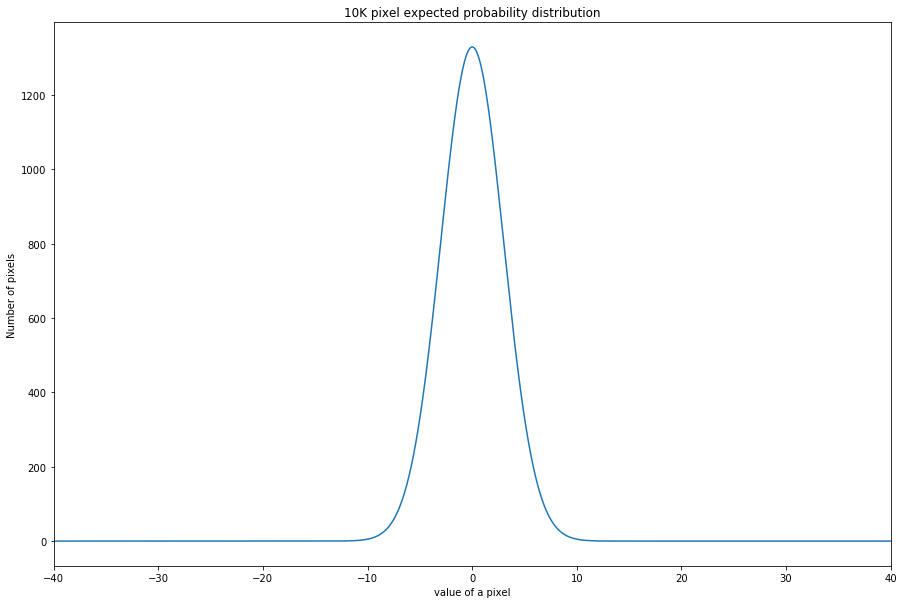

In [92]:
plt.plot(x,Backgound*10000)
plt.xlabel('value of a pixel')
plt.ylabel('Number of pixels')
plt.title('10K pixel expected probability distribution')
#plt.legend()
#plt.yscale('log')
plt.xlim([-40,40])
plt.show()

C)
Now we want to know what is the probability of the background producing a value of 12.112 or higher in a 10k set of pixels. We can do this by looking at the probability of one pixel producing this value then multiply it by 10k since we would expect 10k the number of reading when looking at 10k pixels. after getting probability we convert it into a sigma

In [17]:
p = (1-scipy.stats.norm.cdf(12.112, loc=0, scale=3))*10000
print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))

We get a simga significance of 0.612


4.
A) Now we want to know how much does the trials factor effect the sensitivity of our search first we will see what would be required to have a 5 sigma reading from looking at just one pixel 

In [98]:
p = stats.norm.cdf(5)
print("We would need a reading of {0:1.11f} or larger to reach the five sigma bench mark".format(stats.norm.ppf(p,scale=3)))


We would need a reading of 14.99999999991 or larger to reach the five sigma bench mark


B) Now lets see what we would need in order to get a five sigma reading from 10k pixels

In [19]:
p = 1-stats.norm.cdf(5)
det = stats.norm.ppf(1-(p/10000),scale=3)

#p = (1-scipy.stats.norm.cdf(det, loc=0, scale=3))*10000
#det = stats.norm.ppf(p,scale=3)
print('We get signal with the value of {0:3.3f} or higher to get a sigma significance of 5'.format(det))


We get signal with the value of 19.652 or higher to get a sigma significance of 5


C) ) In order to get a five sigma signal when looking at 10k pixels we need the signal to be about 30% percent brighter than that from looking at just one pixel. This relatively small increases necessary to adjust for a very large increase in the places we are looking is due to how fast the distribution falls of in the range we are interested in. Out in the tail we get order of magnitude drops in the probability for small increases in measurement. Not to say it the probability gets smaller faster but the order of magnitude fall is very fast, you can see this when looking at the curve on a semi log scale the order of magnitude of the probability fall off faster in the tails.

D)Lets see how much of an effect would looking at order of magnitude larger number of pixels have on our 5 sigma sensitivity

In [18]:
p = 1-stats.norm.cdf(5)
t=10000
det = stats.norm.ppf(1-p/t,scale=3)
print('for a trials factor of {0:3.0e} we need a signal of strenth {1:3.3f}'.format(t,det))
t=1000000
det = stats.norm.ppf(1-p/t,scale=3)
print('for a trials factor of {0:3.0e} we need a signal of strenth {1:3.3f}'.format(t,det))
t=1000000000
det = stats.norm.ppf(1-p/t,scale=3)
print('for a trials factor of {0:3.0e} we need a signal of strenth {1:3.3f}'.format(t,det))


for a trials factor of 1e+04 we need a signal of strenth 19.652
for a trials factor of 1e+06 we need a signal of strenth 21.620
for a trials factor of 1e+09 we need a signal of strenth 24.230


As seen above the effect of looking at bigger number of pixels have a small increase in the strength needed to get a significant signal, about of 10% for a 100 time increase in the number of pixels.